In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick  
%matplotlib inline

- Dataset info: Dataset containing kitchen catalog design company churn data showning customer left in last month

In [74]:
#load the dataset
df=pd.read_csv('Kitchen catalog design compnay churn data.csv')
df.head()

,Project Code,Database,Dealer,Cloud Partner,Training Provided,tenure,Recently updated,Catalog Type,Region,Licence Security,...,Licence Protection,TechSupport,Cloud Pulished,GSV added,Contract,PaperlessBilling,PaymentMethod,MonthlyHours,TotalHours,Churn
0,7590-VHVEG,DFM,0,Yes,No,1,No,Countertop,ROAP,No,...,No,No,No,No,T&M,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Common,0,No,No,34,Yes,Cabinetry,ROAP,Yes,...,Yes,No,No,No,AMC,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Common,0,No,No,2,Yes,Cabinetry,ROAP,Yes,...,No,No,No,No,T&M,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Common,0,No,No,45,No,Countertop,ROAP,Yes,...,Yes,Yes,No,No,AMC,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,DFM,0,No,No,2,Yes,Cabinetry,North America,No,...,No,No,No,No,T&M,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['Project Code', 'Database', 'Dealer', 'Cloud Partner',
       'Training Provided', 'tenure', 'Recently updated', 'Catalog Type',
       'Region', 'Licence Security', 'Catalog Locking',
       'Licence Protection', 'TechSupport', 'Cloud Pulished', 'GSV added',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyHours',
       'TotalHours', 'Churn'], dtype=object)

In [5]:
# checking datatypes for all columns
df.dtypes

Project Code           object
Database               object
Dealer                  int64
Cloud Partner          object
Training Provided      object
tenure                  int64
Recently updated       object
Catalog Type           object
Region                 object
Licence Security       object
Catalog Locking        object
Licence Protection     object
TechSupport            object
Cloud Pulished         object
GSV added              object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyHours          float64
TotalHours             object
Churn                  object
dtype: object

In [6]:
# check the descriptive statistics of numerical values in the dataset
df.describe()

,Dealer,tenure,MonthlyHours
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Dealer is categorical value hence the quatile distribution is not proper
- 75% of customer have tenure is less than 55 months
- Avaerage monthly hours are 64.76 whereas 25% customers have more than 89.85 hour per month of work

Text(0.5, 1.0, 'count of Target variable per category')

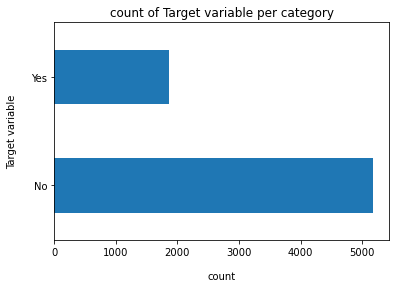

In [75]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("count",labelpad=14)
plt.ylabel("Target variable",labelpad=14)
plt.title('count of Target variable per category')

In [8]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- Observations:Data is highly imbalenced ratio is 73:27

In [76]:
# concise summary of data frame,as we have too many feature, we are using verbose= true mode
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project Code        7043 non-null   object 
 1   Database            7043 non-null   object 
 2   Dealer              7043 non-null   int64  
 3   Cloud Partner       7043 non-null   object 
 4   Training Provided   7043 non-null   object 
 5   tenure              7043 non-null   int64  
 6   Recently updated    7043 non-null   object 
 7   Catalog Type        7043 non-null   object 
 8   Region              7043 non-null   object 
 9   Licence Security    7043 non-null   object 
 10  Catalog Locking     7043 non-null   object 
 11  Licence Protection  7043 non-null   object 
 12  TechSupport         7043 non-null   object 
 13  Cloud Pulished      7043 non-null   object 
 14  GSV added           7043 non-null   object 
 15  Contract            7043 non-null   object 
 16  Paperl

- Missing value: Here we dont have nay missing value

C:\Users\Hcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


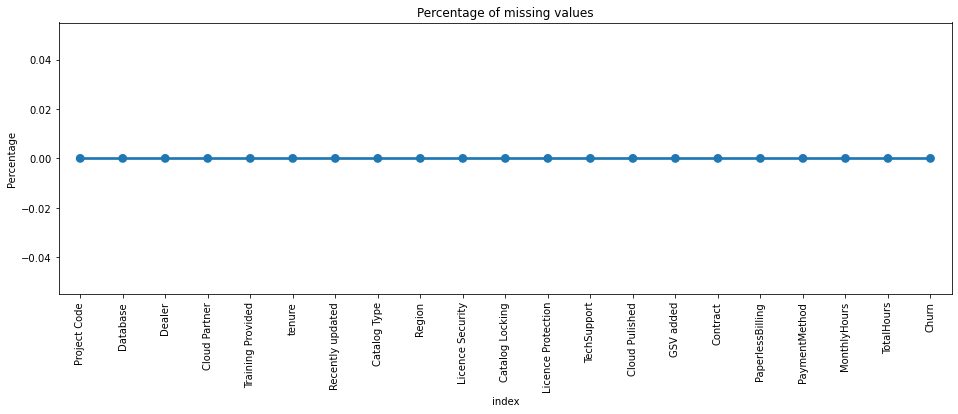

In [77]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Percentage')
plt.title('Percentage of missing values')
plt.show()

- Data Cleaning: Create copy of base dataset for manipulation & processing

In [78]:
df_new=df.copy()

- Total hours should be numemric, let convert them from object to numeric

In [79]:
df_new.TotalHours=pd.to_numeric(df_new.TotalHours,errors= "coerce")
df_new.isnull().sum()

Project Code           0
Database               0
Dealer                 0
Cloud Partner          0
Training Provided      0
tenure                 0
Recently updated       0
Catalog Type           0
Region                 0
Licence Security       0
Catalog Locking        0
Licence Protection     0
TechSupport            0
Cloud Pulished         0
GSV added              0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyHours           0
TotalHours            11
Churn                  0
dtype: int64

<AxesSubplot:>

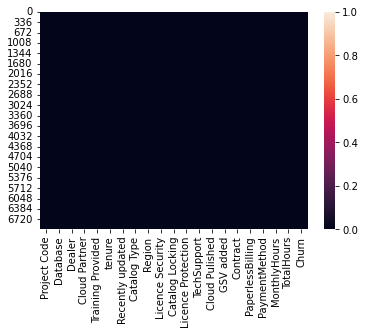

In [80]:
sns.heatmap(df_new.isnull())

In [ ]:
# As we can see there are 11 values are null in Total hours column

In [81]:
df_new.loc[df_new['TotalHours'].isnull()==True].head()

,Project Code,Database,Dealer,Cloud Partner,Training Provided,tenure,Recently updated,Catalog Type,Region,Licence Security,...,Licence Protection,TechSupport,Cloud Pulished,GSV added,Contract,PaperlessBilling,PaymentMethod,MonthlyHours,TotalHours,Churn
488,4472-LVYGI,DFM,0,Yes,Yes,0,No,Countertop,ROAP,Yes,...,Yes,Yes,Yes,No,Fixed Price,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Common,0,No,Yes,0,Yes,Cabinetry,EMEA,No internet service,...,No internet service,No internet service,No internet service,No,Fixed Price,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,DFM,0,Yes,Yes,0,Yes,Cabinetry,ROAP,Yes,...,Yes,No,Yes,Yes,Fixed Price,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Common,0,Yes,Yes,0,Yes,Appliance,EMEA,No internet service,...,No internet service,No internet service,No internet service,No,Fixed Price,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,DFM,0,Yes,Yes,0,No,Countertop,ROAP,Yes,...,Yes,Yes,Yes,No,Fixed Price,No,Credit card (automatic),56.05,NaN,No


# Missing Value handling

- since the % of these missing value record is very low i.e 0.15% it is safe to ignore these records from further operations

In [15]:
#removing missing values
df_new.dropna(how='any',inplace=True)
df_new.shape

(7032, 21)

- Lets divide customers in to bins on the basis of Tenure
- e.g 
- for <12 months assign tenure group 1 year
- for 13 to 24 months assign tenure group as 2 years and so on...

In [16]:
#get the max tenure
print(df_new['tenure'].max())

72


In [82]:
#Group the tenure in to bins of 12 months
lables=[("{0} - {1}").format(i,i+11) for i in range(1,72,12)]
df_new['tenure_group']=pd.cut(df_new.tenure,range(0,80,12),labels = lables)

In [83]:
df_new['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

- Let's drop column which are not neccessory

In [84]:
df_new.drop(columns= ['Project Code','tenure'], axis=1,inplace=True)
df_new

,Database,Dealer,Cloud Partner,Training Provided,Recently updated,Catalog Type,Region,Licence Security,Catalog Locking,Licence Protection,TechSupport,Cloud Pulished,GSV added,Contract,PaperlessBilling,PaymentMethod,MonthlyHours,TotalHours,Churn,tenure_group
0,DFM,0,Yes,No,No,Countertop,ROAP,No,Yes,No,No,No,No,T&M,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,No,Yes,No,No,No,AMC,No,Mailed check,56.95,1889.50,No,25 - 36
2,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,Yes,No,No,No,No,T&M,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Common,0,No,No,No,Countertop,ROAP,Yes,No,Yes,Yes,No,No,AMC,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,DFM,0,No,No,Yes,Cabinetry,North America,No,No,No,No,No,No,T&M,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Common,0,Yes,Yes,Yes,Appliance,ROAP,Yes,No,Yes,Yes,Yes,Yes,AMC,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,DFM,0,Yes,Yes,Yes,Appliance,North America,No,Yes,Yes,No,Yes,Yes,AMC,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,DFM,0,Yes,Yes,No,Countertop,ROAP,Yes,No,No,No,No,No,T&M,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Common,1,Yes,No,Yes,Appliance,North America,No,No,No,No,No,No,T&M,Yes,Mailed check,74.40,306.60,Yes,1 - 12


# Data Exploration

1. Univariate Analysis

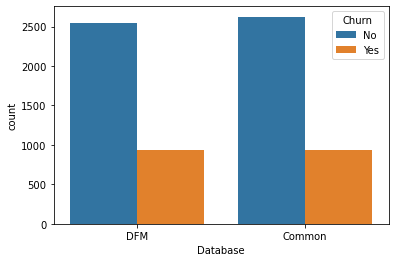

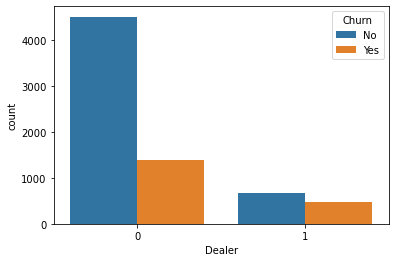

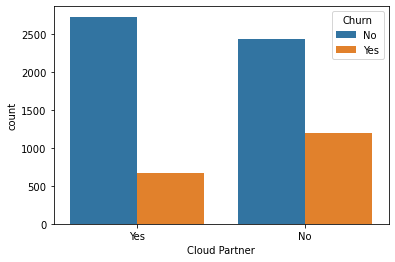

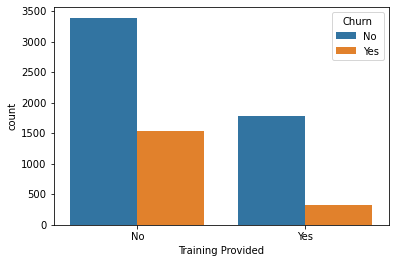

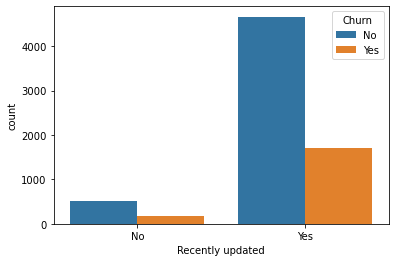

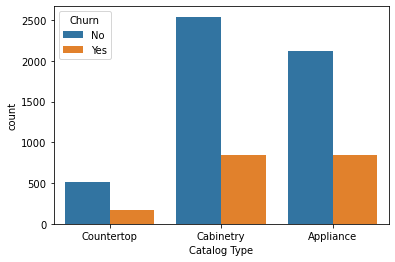

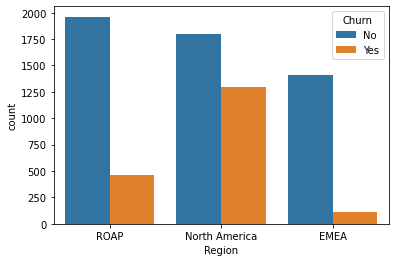

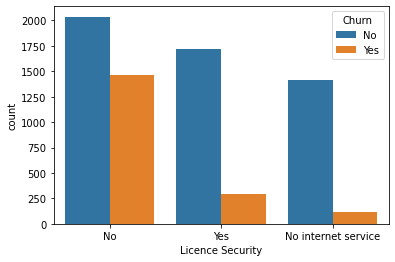

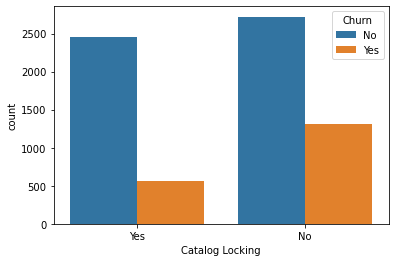

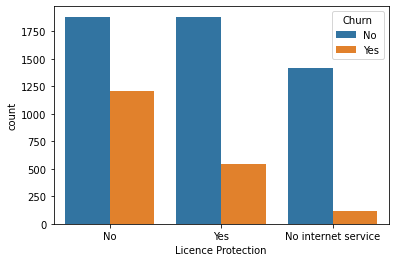

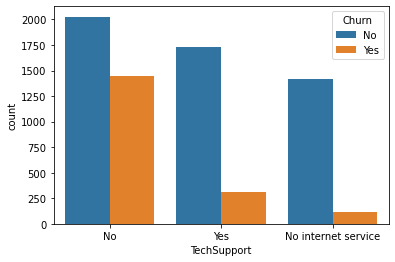

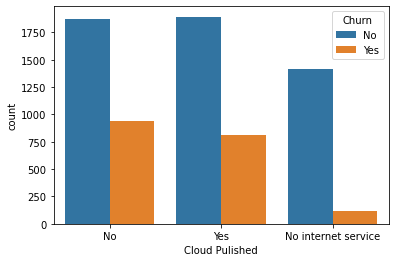

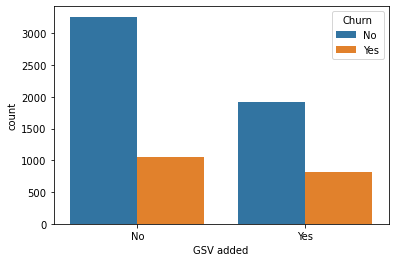

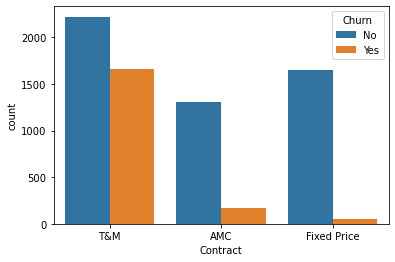

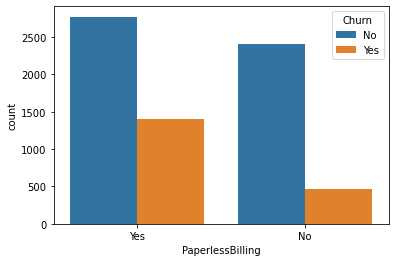

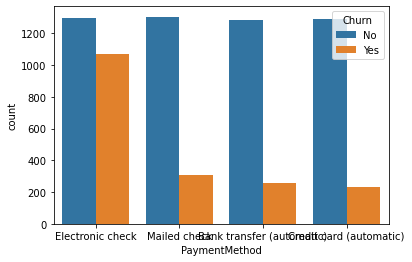

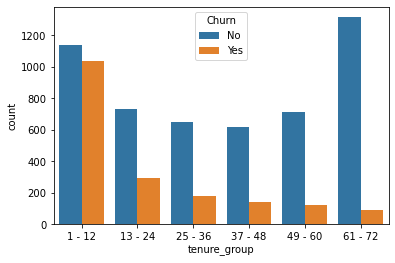

In [85]:
for i, j in enumerate(df_new.drop(columns=['Churn','TotalHours','MonthlyHours'])):
    plt.figure(i)
    sns.countplot(data=df_new, x=j, hue='Churn')

# #Observations
- if customer is dealer is more likely to churn
- Non GSV clients are high churners
- Client having T&M contract they are highly a churner FP client are less like to churn

1. Convert target variable "churn" in a binary numeric variable i.e Yes=1, No=0

In [86]:
df_new['Churn']=np.where(df_new.Churn=='Yes',1,0)
df_new.head()

,Database,Dealer,Cloud Partner,Training Provided,Recently updated,Catalog Type,Region,Licence Security,Catalog Locking,Licence Protection,TechSupport,Cloud Pulished,GSV added,Contract,PaperlessBilling,PaymentMethod,MonthlyHours,TotalHours,Churn,tenure_group
0,DFM,0,Yes,No,No,Countertop,ROAP,No,Yes,No,No,No,No,T&M,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,No,Yes,No,No,No,AMC,No,Mailed check,56.95,1889.50,0,25 - 36
2,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,Yes,No,No,No,No,T&M,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Common,0,No,No,No,Countertop,ROAP,Yes,No,Yes,Yes,No,No,AMC,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,DFM,0,No,No,Yes,Cabinetry,North America,No,No,No,No,No,No,T&M,Yes,Electronic check,70.70,151.65,1,1 - 12


In [87]:
df_new.to_csv('churn_data_new.csv')

2. convert all categorical values in to numerical values

In [30]:
df_new_dummy=pd.get_dummies(df_new)
df_new_dummy.head()

,Dealer,MonthlyHours,TotalHours,Churn,Database_Common,Database_DFM,Cloud Partner_No,Cloud Partner_Yes,Training Provided_No,Training Provided_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


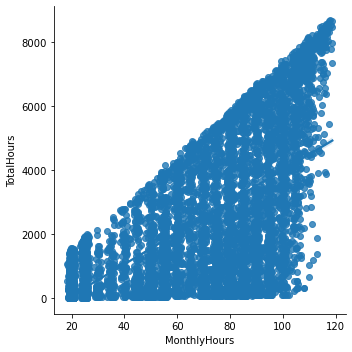

In [31]:
#relationship bet monthly hours & total hours
sns.lmplot(data=df_new_dummy, x="MonthlyHours", y="TotalHours")

- Obs: Total hours increases as monthly hours increases. They are highly correlates

- Churn by total hours & monthly hours

Text(0.5, 1.0, 'Monthly hours by Churn')

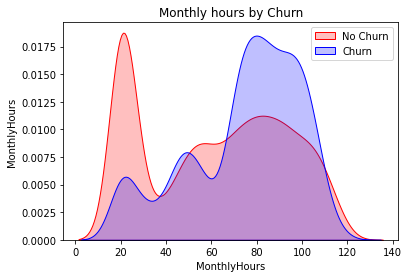

In [32]:
Month_hr=sns.kdeplot(df_new_dummy.MonthlyHours[(df_new_dummy['Churn']==0)],
                    color='Red',shade=True)
Month_hr=sns.kdeplot(df_new_dummy.MonthlyHours[(df_new_dummy['Churn']==1)],
                    color='Blue',shade=True)
Month_hr.legend(["No Churn","Churn"],loc="upper right")
Month_hr.set_ylabel("MonthlyHours")
Month_hr.set_title("Monthly hours by Churn")

Text(0.5, 1.0, 'Total hours by Churn')

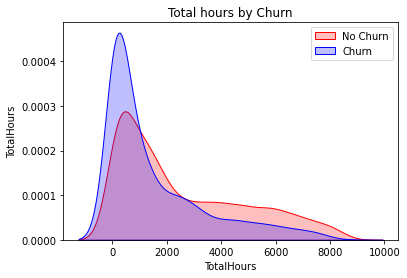

In [33]:
Total_hr=sns.kdeplot(df_new_dummy.TotalHours[(df_new_dummy['Churn']==0)],
                    color='Red',shade=True)
Total_hr=sns.kdeplot(df_new_dummy.TotalHours[(df_new_dummy['Churn']==1)],
                    color='Blue',shade=True)
Total_hr.legend(["No Churn","Churn"],loc="upper right")
Total_hr.set_ylabel("TotalHours")
Total_hr.set_title("Total hours by Churn")

# Observation:

- High churn are low total hours.
- if we consider Tenure, Monthly hours and Total hours, Higher montly hours at lower tenure result in to lower total hours
  then we can say that all three factors- Higher montly hours, lower tenure and lower total hours are likly to High Churn

- Let's see correlation of all predictors with target variable i.e churn

<AxesSubplot:>

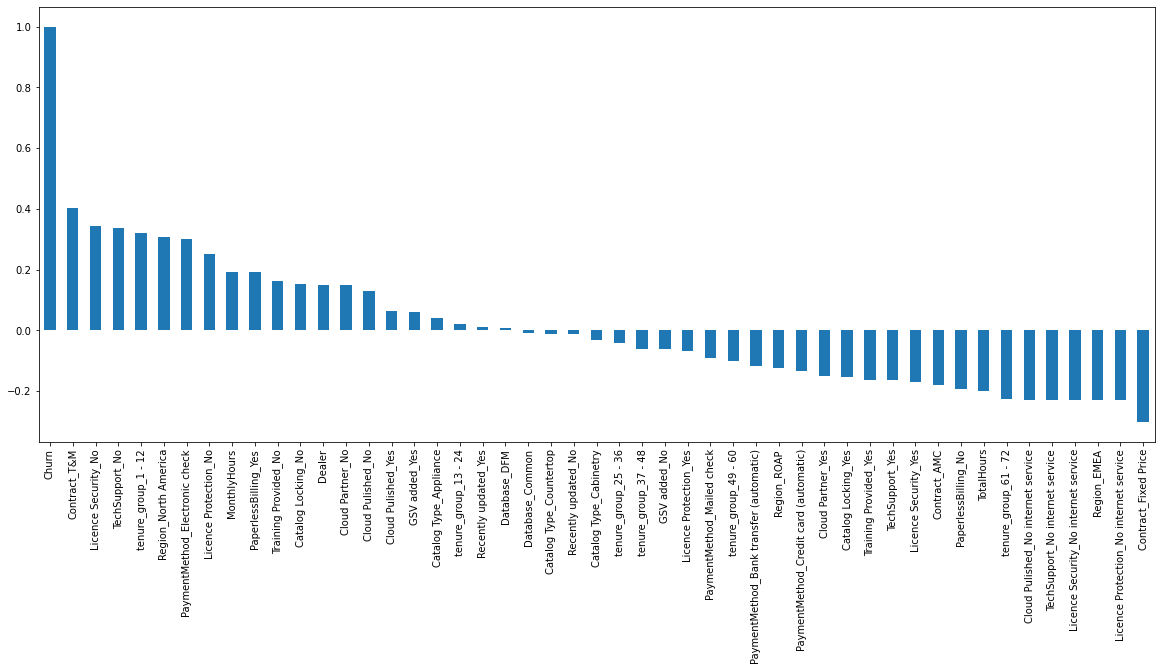

In [34]:
plt.figure(figsize=(20,8))
df_new_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Derived Insight:

- HIGH Churn seen in case of T&M contract, No Licence security, No Tech support, First year of subscription and North American clients
- LOW Churn is seens in case of Fixed price contracts, License protection without internet service and EMEA region clients
- Factors like database type, catalog type, recent update are NO impact on Churn
- This is also evident from the Heatmap below

<AxesSubplot:>

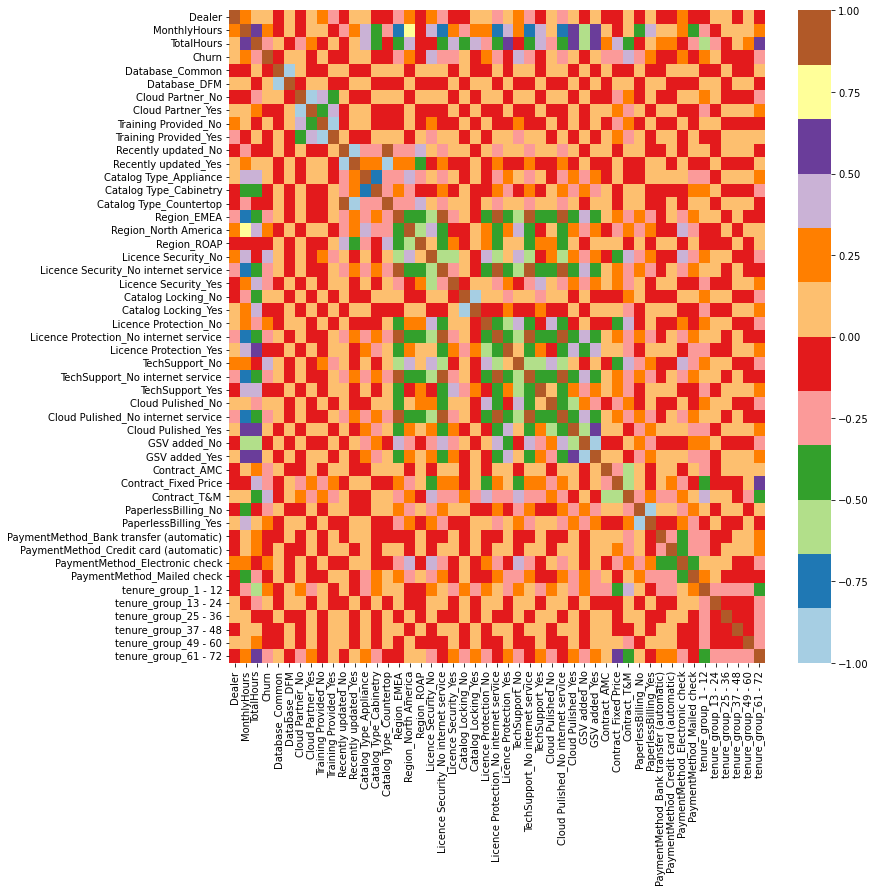

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new_dummy.corr(), cmap="Paired")

2. Bivariate Analysis

In [36]:
new_df1_target0=df_new.loc[df_new["Churn"]==0]
new_df1_target1=df_new.loc[df_new["Churn"]==1]

In [37]:
def uniplot(df1,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df1[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [39]:
df_new.head()

,Database,Dealer,Cloud Partner,Training Provided,Recently updated,Catalog Type,Region,Licence Security,Catalog Locking,Licence Protection,TechSupport,Cloud Pulished,GSV added,Contract,PaperlessBilling,PaymentMethod,MonthlyHours,TotalHours,Churn,tenure_group
0,DFM,0,Yes,No,No,Countertop,ROAP,No,Yes,No,No,No,No,T&M,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,No,Yes,No,No,No,AMC,No,Mailed check,56.95,1889.50,0,25 - 36
2,Common,0,No,No,Yes,Cabinetry,ROAP,Yes,Yes,No,No,No,No,T&M,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Common,0,No,No,No,Countertop,ROAP,Yes,No,Yes,Yes,No,No,AMC,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,DFM,0,No,No,Yes,Cabinetry,North America,No,No,No,No,No,No,T&M,Yes,Electronic check,70.70,151.65,1,1 - 12


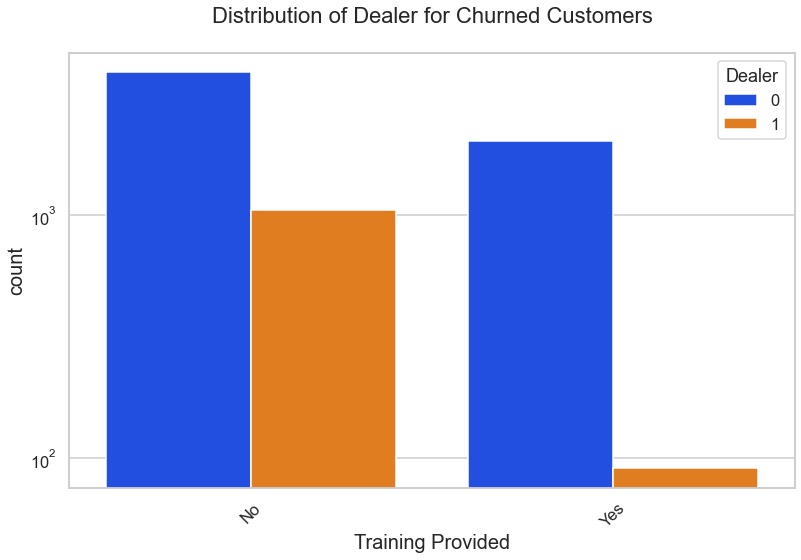

In [47]:
uniplot(new_df1_target1,col='Training Provided',title='Distribution of Dealer for Churned Customers',hue='Dealer')

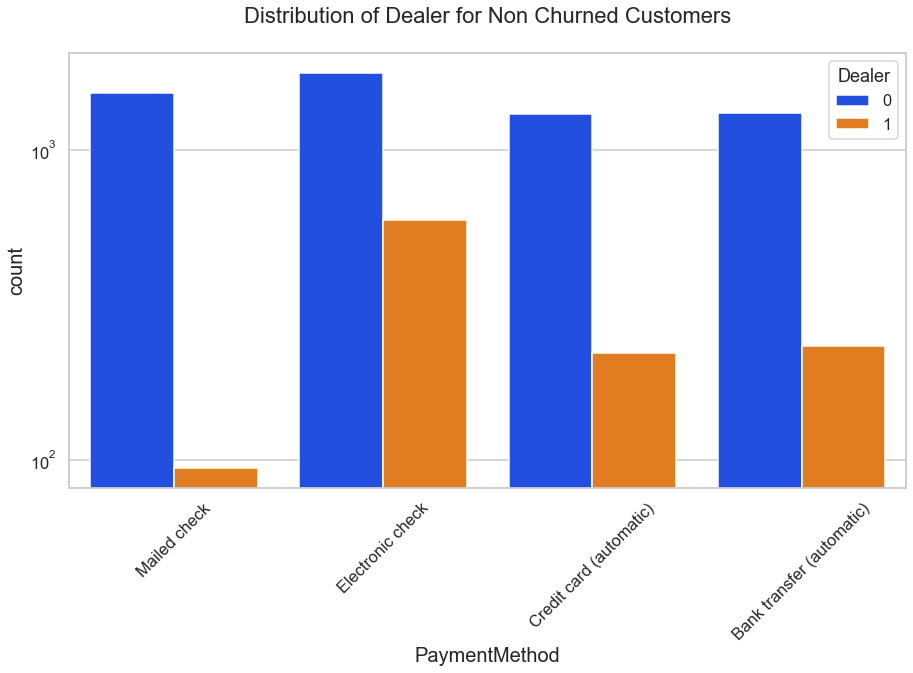

In [48]:
uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of Dealer for Non Churned Customers',hue='Dealer')

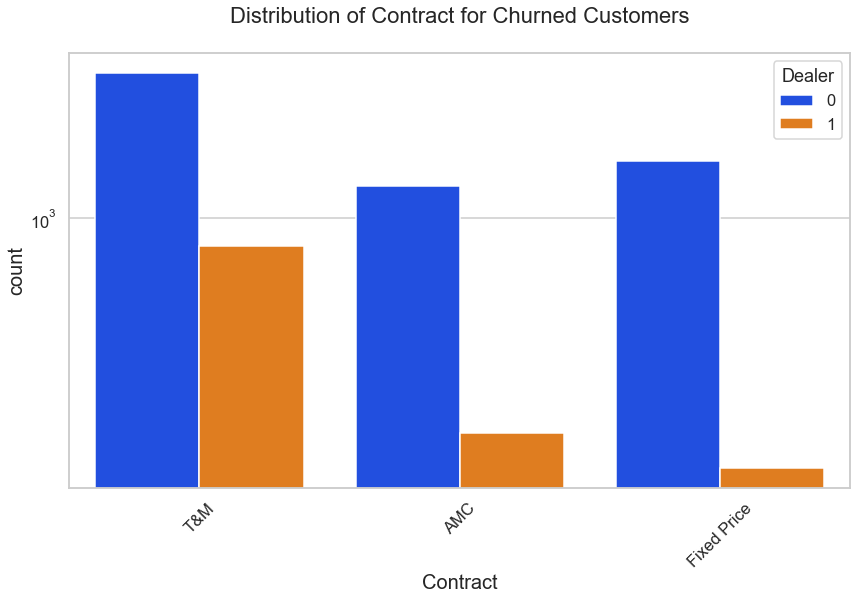

In [49]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='Dealer')

# Conclusion

1. Electronic check medium are the highest churners
2. Contract Type - T&M customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Licence security, No Tech Support category are high churners
4. Non Dealer clients are high churners

In [50]:
df_new_dummy.to_csv('dummy_churn_data.csv')

In [5]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [6]:
df=pd.read_csv("dummy_churn_data.csv")
df.head()

,Unnamed: 0,Dealer,MonthlyHours,TotalHours,Churn,Database_Common,Database_DFM,Cloud Partner_No,Cloud Partner_Yes,Training Provided_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
X=df.drop('Churn',axis=1)
X.head()

,Dealer,MonthlyHours,TotalHours,Database_Common,Database_DFM,Cloud Partner_No,Cloud Partner_Yes,Training Provided_No,Training Provided_Yes,Recently updated_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [10]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [13]:
#Test Train split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=34)

## Apply the first model- Decision Tree

In [19]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred=model_dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
model_dt.score(X_test,y_test)

0.7242359630419332

In [22]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1040
           1       0.47      0.49      0.48       367

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



In [31]:
print(confusion_matrix(y_test, y_pred))

[[838 202]
 [186 181]]


-As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [25]:
sm = SMOTEENN()

In [36]:
X_resampled, y_resampled = sm.fit_resample(X,y)

In [37]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=34)
model_dt_smote=DecisionTreeClassifier()
model_dt_smote.fit(Xr_train,yr_train)
yr_pred=model_dt_smote.predict(Xr_test)
yr_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
model_dt_smote.score(Xr_test,yr_test)

0.9403361344537815

In [39]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       504
           1       0.96      0.94      0.95       686

    accuracy                           0.94      1190
   macro avg       0.94      0.94      0.94      1190
weighted avg       0.94      0.94      0.94      1190



# Apply the first model- Random Forest
 #### On resampled data

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=34)
model_rf_smote=RandomForestClassifier()
model_rf_smote.fit(Xr_train,yr_train)
yr_pred=model_rf_smote.predict(Xr_test)
yr_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
model_score_rf = model_rf_smote.score(Xr_test, yr_test)
model_score_rf

0.9546218487394958

In [53]:
print(model_score_rf)
print(metrics.classification_report(yr_test, yr_pred))

0.9546218487394958
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       504
           1       0.96      0.96      0.96       686

    accuracy                           0.95      1190
   macro avg       0.95      0.95      0.95      1190
weighted avg       0.95      0.95      0.95      1190



In [54]:
print(metrics.confusion_matrix(yr_test, yr_pred))

[[479  25]
 [ 29 657]]


- With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

In [55]:
import pickle

In [56]:
#open file, when you want to store data in that file
file=open('model.pkl','wb')

#dump information in to the file
pickle.dump(model_rf_smote,file)

In [65]:
# unpickling file if needed
file=open('model.pkl','rb')

In [67]:
load_model=pickle.load(open('model.pkl','rb'))

In [68]:
load_model.score(Xr_test, yr_test)

0.9546218487394958